In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)  #sets nice background color

# Importing the dataset

In [2]:
zom = pd.read_csv('../input/zomato.csv')

In [3]:
zom.head()

#Getting the 1st 5 rows of the dataset

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zom.shape

#There are around 51k rows and 17 columns 

(51717, 17)

# EDA and cleaning of data


In [5]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
zom.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


#### Therefore average number of votes for the restaurants is around 283.

In [7]:
#Removing the Duplicates
zom.duplicated().sum()
zom.drop_duplicates(inplace=True)


In [8]:
#dropping irrelevant columns
zom=zom.drop(['url','address','phone','dish_liked', 'menu_item', 'reviews_list'],axis=1) 
zom.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [9]:
pd.DataFrame( zom.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
name,0
online_order,0
book_table,0
rate,7775
votes,0
location,21
rest_type,227
cuisines,45
approx_cost(for two people),346
listed_in(type),0


In [10]:
zom['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1/5     1474
4.1 /5    1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
4.4/5      519
          ... 
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
2.4 /5      30
4.9 /5      30
2.3/5       28
4.9/5       25
4.8/5       23
2.3 /5      23
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [11]:
zom['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
zom = zom.loc[zom.rate !='NEW']
zom = zom.loc[zom.rate !='-'].reset_index(drop=True)
remove_denom = lambda x: x.replace('/5', '') if type(x) == np.str else x
zom.rate = zom.rate.apply(remove_denom).str.strip().astype('float')
zom['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
zom["rate"] = zom["rate"].fillna(zom["rate"].median())


In [14]:
pd.DataFrame( zom.isnull().sum(), columns= ['Number of missing values'])

# All missing values from rate is gone

,Number of missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,225
cuisines,45
approx_cost(for two people),341
listed_in(type),0


In [15]:
zom['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [16]:
zom['approx_cost(for two people)'] = zom['approx_cost(for two people)'].astype(str)
zom['approx_cost(for two people)'] = zom['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))
zom['approx_cost(for two people)'] = zom['approx_cost(for two people)'].astype(float)
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 11 columns):
name                           49440 non-null object
online_order                   49440 non-null object
book_table                     49440 non-null object
rate                           49440 non-null float64
votes                          49440 non-null int64
location                       49419 non-null object
rest_type                      49215 non-null object
cuisines                       49395 non-null object
approx_cost(for two people)    49099 non-null float64
listed_in(type)                49440 non-null object
listed_in(city)                49440 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 4.1+ MB


In [17]:
zom['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
         80.,   50.,  190., 1700.,   nan,  180., 1350., 2200., 1400.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  240., 6000., 1050., 2300., 4100., 5000.,
       3700., 1650., 2700., 4500.,  140.,  360.])

In [18]:
zom["approx_cost(for two people)"] = zom["approx_cost(for two people)"].fillna(zom["approx_cost(for two people)"].median())


In [19]:
pd.DataFrame( zom.isnull().sum(), columns= ['Number of missing values'])

#Filled NaN values in cost for two peopel column as well

,Number of missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,225
cuisines,45
approx_cost(for two people),0
listed_in(type),0


In [20]:
zom["location"] = zom['location'].fillna(zom["location"].mode().iloc[0])
zom["rest_type"] = zom["rest_type"].fillna(zom["rest_type"].mode().iloc[0])
zom["cuisines"] = zom["cuisines"].fillna(zom["cuisines"].mode().iloc[0])


#May have contrasting inputs but best for data to be filled with mode.

In [21]:
pd.DataFrame( zom.isnull().sum(), columns= ['Number of missing values'])


,Number of missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
listed_in(type),0


#### We have eliminated all the null values and filled with approriate values

In [22]:
zom.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# Visualization

### Top 5 popular localities

In [23]:
top_5_loc = zom.location.value_counts().nlargest(5)

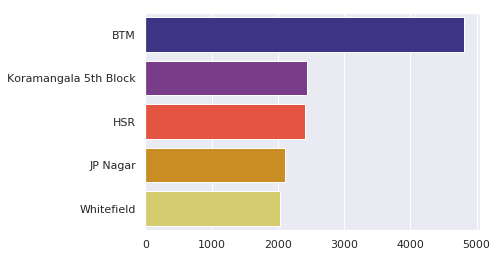

In [24]:
sns.barplot(y=top_5_loc.index, x=top_5_loc.values, palette="CMRmap")

### BTM seems to be the most popular locality in BTM for restaurants


### Top 5 famous Restaurant types

In [25]:
top_5_rest = zom.rest_type.value_counts().nlargest(5)

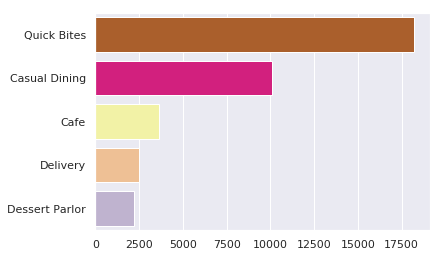

In [26]:
sns.barplot(y=top_5_rest.index, x=top_5_rest.values, palette="Accent_r")

### Quick bites type of restaurants seem to be the most famous

# Top 5 cuisine options 


In [27]:
top_5_cui = zom.cuisines.value_counts().nlargest(5)

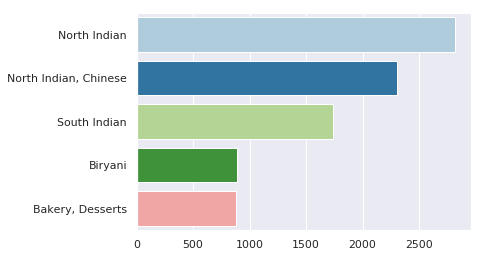

In [28]:
sns.barplot(y=top_5_cui.index, x=top_5_cui.values, palette="Paired")

### North indian seems to be the most popular cuisine

# Restuarants with most outlets


In [29]:
top_5_res = zom.name.value_counts().nlargest(5)

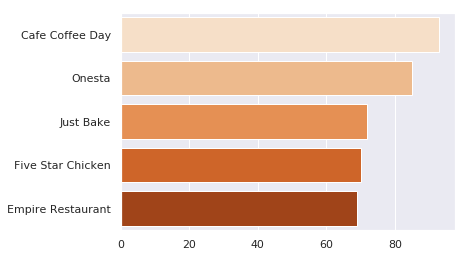

In [30]:
sns.barplot(y=top_5_res.index, x=top_5_res.values, palette="Oranges")

### Cafe coffee day has the maximum number of outlets in Bangalore

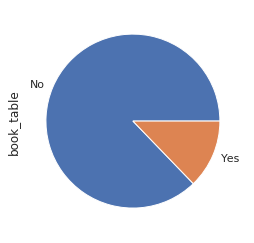

In [31]:
zom.book_table.value_counts().plot(kind='pie')

### Many restaurants don't require their customers to book a table in advance

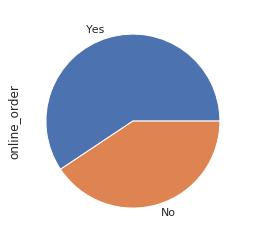

In [32]:
zom.online_order.value_counts().plot(kind='pie')

### Most of the outlets have the option where customers can order food online as well.

# Visualising relation btw online order and ratings

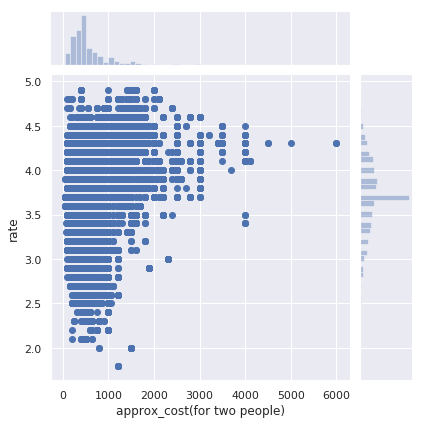

In [33]:
sns.jointplot(data=zom, x="approx_cost(for two people)", y="rate")

#### There doesn't seem to be a relation between cost and ratings of a restaurant. On the contarty, one may beliee that an expensive restaurant will have higher ratings.

In [34]:
zom.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [35]:
zom.rest_type.value_counts()

Quick Bites                    18228
Casual Dining                  10066
Cafe                            3610
Delivery                        2493
Dessert Parlor                  2188
Takeaway, Delivery              1857
Casual Dining, Bar              1123
Bakery                          1070
Beverage Shop                    805
Bar                              687
Food Court                       597
Sweet Shop                       463
Bar, Casual Dining               400
Lounge                           381
Pub                              353
Fine Dining                      346
Casual Dining, Cafe              318
Beverage Shop, Quick Bites       294
Bakery, Quick Bites              283
Mess                             253
Pub, Casual Dining               236
Sweet Shop, Quick Bites          177
Kiosk                            174
Cafe, Casual Dining              173
Cafe, Bakery                     164
Bakery, Dessert Parlor           147
Cafe, Dessert Parlor             144
D

# Model building

In [36]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

zom['online_order'] = lb_make.fit_transform(zom['online_order'])
zom['book_table'] = lb_make.fit_transform(zom['book_table'])
zom['location'] = lb_make.fit_transform(zom['location'])
zom['rest_type'] = lb_make.fit_transform(zom['rest_type'])
zom['cuisines'] = lb_make.fit_transform(zom['cuisines'])
zom['listed_in(type)'] = lb_make.fit_transform(zom['listed_in(type)'])



In [37]:
X= zom.drop(labels=['name', 'rate', 'listed_in(city)'], axis=1)
y = zom[['rate']]
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,1,1,775,1,27,2091,800.0,0
1,1,0,787,1,27,922,800.0,0
2,1,0,918,1,22,743,800.0,0
3,0,0,88,1,78,2469,300.0,0
4,0,0,166,4,27,2119,600.0,0


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



model = LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)


In [40]:
print('Accuracy prediction for Linear Regression model :', r2_score(y_test,y_pred))


Accuracy prediction for Linear Regression model : 0.2637941250626703


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# tuning=dict()
rf=RandomForestRegressor(n_estimators=200,random_state=50,min_samples_leaf=.00001)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9343210771090478

In [42]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(X_train, y_train)
y_predict=xgb.predict(X_test)

r2_score(y_test,y_predict)

[17:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9459173741322211

# Out of the three models, XGBoost seems to be the best model with highest r2 score.

In [43]:
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,1,1,775,1,27,2091,800.0,0
1,1,0,787,1,27,922,800.0,0
2,1,0,918,1,22,743,800.0,0
3,0,0,88,1,78,2469,300.0,0
4,0,0,166,4,27,2119,600.0,0


In [61]:
new_input = [1, 1, 920, 5, 27, 922, 500.0, 0]
rest = pd.DataFrame(new_input)
rest.T.columns =["online_order","book_table","votes","location","rest_type","cuisines","cost","type"]
rest.T
y_pred_new=rf.predict(rest.T)

print('The new restaurant type is predicted to have a rating of -> ',y_pred_new)


The new restaurant type is predicted to have a rating of ->  [3.8675]


# Conclusion : Using the Zomato restaurants dataset, we have explored the relations between different features like lcoation, online order, etc. Using XGB model which has the best accuracy, we have succesfully predicted the rating of a restaurant, given other parameters